# Stock Analysis - Hands on

### Step 1: Stocks Data Retrieving from Yahoo Finance(Advanced Micro Devices,                       Inc. (AMD)) From 31-Dec-2013 to 03-Sept-2019(Historical Data)
### Step 2: ReSampling Data (Monthly,Quaterly,Yearly)
### Step 3: Moving Windows (How stock performed)
### Step 4: Volatility (Which Stock is more)


In [10]:
import pandas as pd
amd = pd.read_csv("AMD.csv")

In [11]:
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,3.87,3.88,3.83,3.87,3.87,12347800
1,2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2,2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
3,2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
4,2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100


In [12]:
amd.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
1433,2019-09-11,30.379999,30.43,29.510000,29.760000,29.760000,50631700
1434,2019-09-12,30.080000,30.84,29.950001,30.209999,30.209999,53618300
1435,2019-09-13,30.270000,30.85,29.950001,30.690001,30.690001,47758800


### Using Date Column as Index

In [13]:
amd = pd.read_csv("AMD.csv",header=0,index_col="Date",parse_dates=True)
amd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-31,3.87,3.88,3.83,3.87,3.87,12347800
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100


## Importing Dataset from Yahoo by Using Pandas DataReader 

In [14]:
import pandas_datareader as pdr

In [15]:
import datetime

In [17]:
# Nvidia Corporation Data From Yahoo Finance
nvda = pdr.get_data_yahoo('NVDA',
                         start=datetime.datetime(2004,1,1),
                         end=datetime.datetime(2019,9,15))

In [19]:
# QualComm Data from Yahoo Finance
qcom = pdr.get_data_yahoo('QCOM',
                         start=datetime.datetime(2004,1,1),
                         end=datetime.datetime(2019,9,15))

In [20]:
# Nvidia Corporation Data From Yahoo Finance
amd1 = pdr.get_data_yahoo('AMD',
                         start=datetime.datetime(2004,1,1),
                         end=datetime.datetime(2019,9,15))

In [21]:
# Intel Corporation Data From Yahoo Finance
intc = pdr.get_data_yahoo('INTC',
                         start=datetime.datetime(2004,1,1),
                         end=datetime.datetime(2019,9,15))

In [22]:
# IBM Data From Yahoo Finance
ibm = pdr.get_data_yahoo('IBM',
                        start=datetime.datetime(2004,1,1),
                        end=datetime.datetime(2019,9,15))

In [23]:
type(amd),type(nvda)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [24]:
nvda.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-12-31,7.950000,7.606667,7.913333,7.733333,12431700.0,7.110125
2004-01-02,7.963333,7.693333,7.856667,7.693333,10910400.0,7.073349


In [25]:
ibm.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-12,144.039993,141.880005,144.029999,143.619995,2505400.0,134.870392
2019-09-13,144.649994,143.259995,144.320007,143.669998,2206600.0,134.917328


In [26]:
ibm.describe()

,High,Low,Open,Close,Volume,Adj Close
count,3953.000000,3953.000000,3953.000000,3953.000000,3.953000e+03,3953.000000
mean,138.687144,136.603256,137.592914,137.667974,5.652203e+06,103.295775
std,38.483964,38.209233,38.352910,38.349583,3.084366e+06,33.805280
min,73.690002,69.500000,72.529999,71.739998,1.027500e+06,46.632313
25%,103.000000,100.190002,101.279999,101.629997,3.657600e+06,68.619553
50%,141.000000,139.080002,139.929993,140.039993,4.853000e+06,114.923225
75%,167.449997,165.100006,166.250000,166.250000,6.679400e+06,132.654068
max,215.899994,214.300003,215.380005,215.800003,3.077070e+07,158.909164


In [27]:
nvda.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [28]:
nvda.index, amd.index, ibm.index

(DatetimeIndex(['2003-12-31', '2004-01-02', '2004-01-05', '2004-01-06',
                '2004-01-07', '2004-01-08', '2004-01-09', '2004-01-12',
                '2004-01-13', '2004-01-14',
                ...
                '2019-08-30', '2019-09-03', '2019-09-04', '2019-09-05',
                '2019-09-06', '2019-09-09', '2019-09-10', '2019-09-11',
                '2019-09-12', '2019-09-13'],
               dtype='datetime64[ns]', name='Date', length=3953, freq=None),
 DatetimeIndex(['2013-12-31', '2014-01-02', '2014-01-03', '2014-01-06',
                '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
                '2014-01-13', '2014-01-14',
                ...
                '2019-08-30', '2019-09-03', '2019-09-04', '2019-09-05',
                '2019-09-06', '2019-09-09', '2019-09-10', '2019-09-11',
                '2019-09-12', '2019-09-13'],
               dtype='datetime64[ns]', name='Date', length=1436, freq=None),
 DatetimeIndex(['2003-12-31', '2004-01-02', '2004-01

In [29]:
nvda.shape, ibm.shape, amd.shape

((3953, 6), (3953, 6), (1436, 6))

## Time Series Data Visualization

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
import matplotlib.dates as mdates

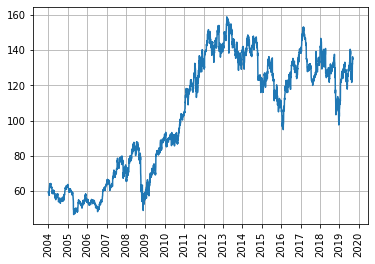

In [32]:
plt.plot(ibm.index, ibm['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

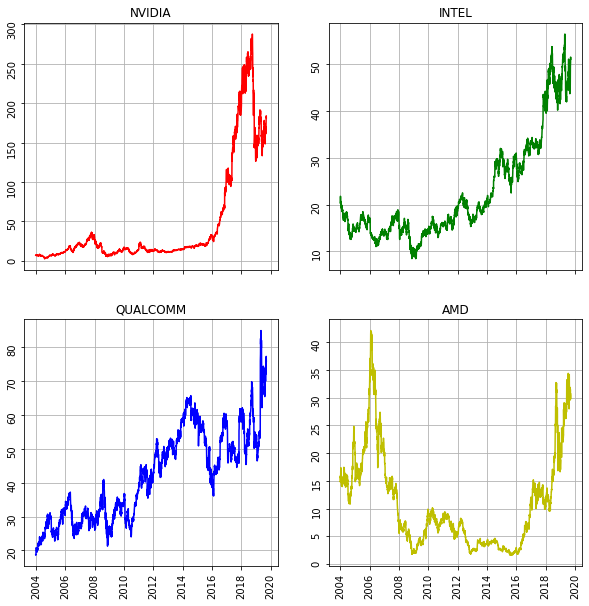

In [33]:
# SubPlots
f,ax = plt.subplots(2,2,figsize=(10,10),sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(nvda.index, nvda['Adj Close'],color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('NVIDIA');

ax[0,1].plot(intc.index, intc['Adj Close'],color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('INTEL');

ax[1,0].plot(qcom.index, qcom['Adj Close'],color='b')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('QUALCOMM');

ax[1,1].plot(amd1.index, amd1['Adj Close'],color='y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('AMD');

